In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('titanic.xls')

In [3]:
train.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Exploratory Data Analysis
#Let's begin some exploratory data analysis! I'll start by checking out missing data!

In [5]:
#Missing Data
#We can use seaborn to create a simple heatmap to see where we are missing data

In [6]:
train.isnull()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

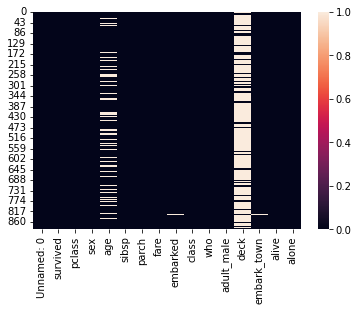

In [7]:
sns.heatmap(train.isnull())

In [8]:
#Roughly 20 percent of the Age data is missing.
#Looking at the deck column, it looks like we are just missing too much of that data to do something useful with at a basic level.


#Let's continue on by visualizing some more of the data
#this code is just to serve as reference.

<AxesSubplot:xlabel='survived', ylabel='count'>

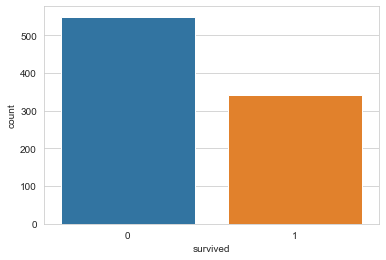

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

In [10]:
#we can see that more than 550 people have not survived while the orange box indicates that more 
#more than 300 people survived

<AxesSubplot:xlabel='survived', ylabel='count'>

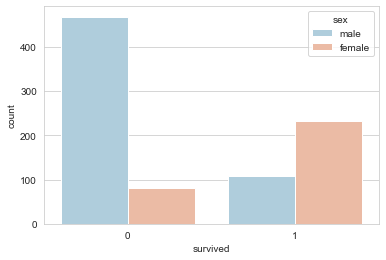

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

In [12]:
#from the above we can see that more males didnt survive

<AxesSubplot:xlabel='survived', ylabel='count'>

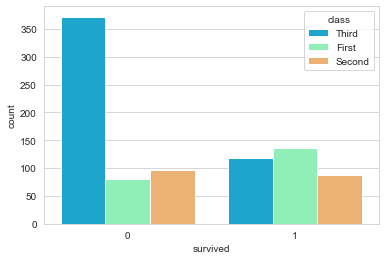

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='class',data=train,palette='rainbow')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

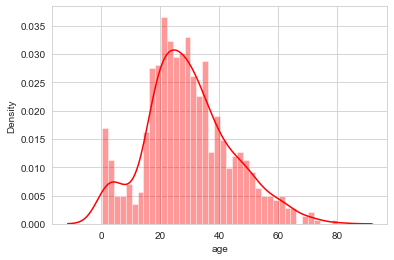

In [14]:
sns.distplot(train['age'].dropna(),kde=True,color='red',bins=40)

<AxesSubplot:>

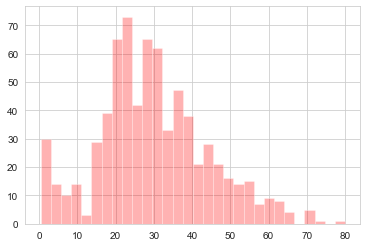

In [15]:
train['age'].hist(bins=30,color='red',alpha=0.3)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

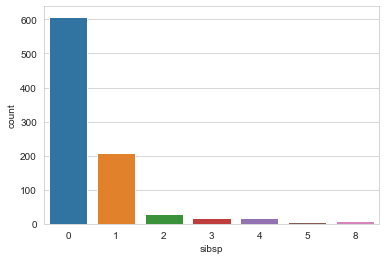

In [16]:
sns.countplot(x='sibsp',data=train)

<AxesSubplot:>

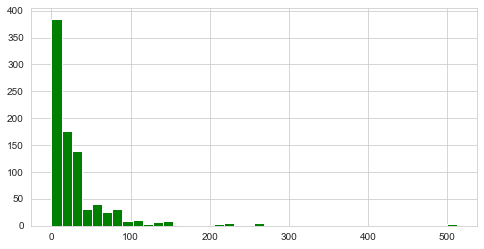

In [17]:
train['fare'].hist(color='green',bins=40,figsize=(8,4))

In [18]:
##Data Cleaning
#I want to fill in missing age data instead of just dropping the missing age data rows. 
#lets do this is by filling in the mean age of all the passengers (imputation).
#However it can be smarter about this and check the average age by passenger class.

<AxesSubplot:xlabel='pclass', ylabel='age'>

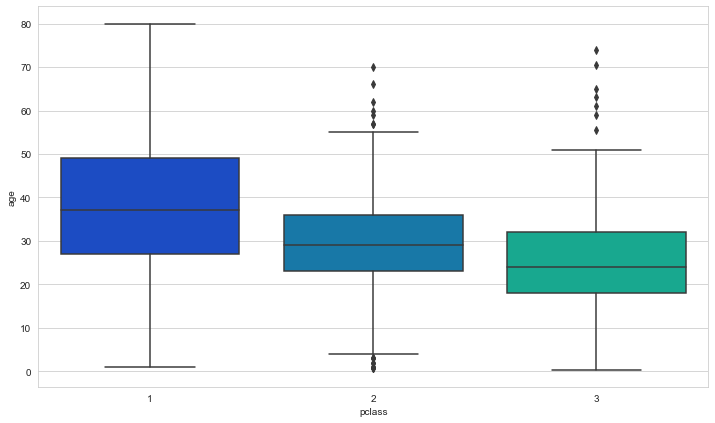

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

In [20]:
#We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
